<a href="https://colab.research.google.com/github/HuyenNguyenHelen/INFO-5505---Machine-learning/blob/main/HuyenNguyen_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: Logistic Regression
Data: [redwinequality.csv](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)

Goal: To predict the quality of red wine (good quality or bad quality) using the given predictors

In [1]:
# import primary essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Load the dataset

In [2]:
data=pd.read_csv('/content/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
print('Column names: \n', [name for name in data.columns])

Column names: 
 ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


## Data preprocessing and exploratory analysis

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


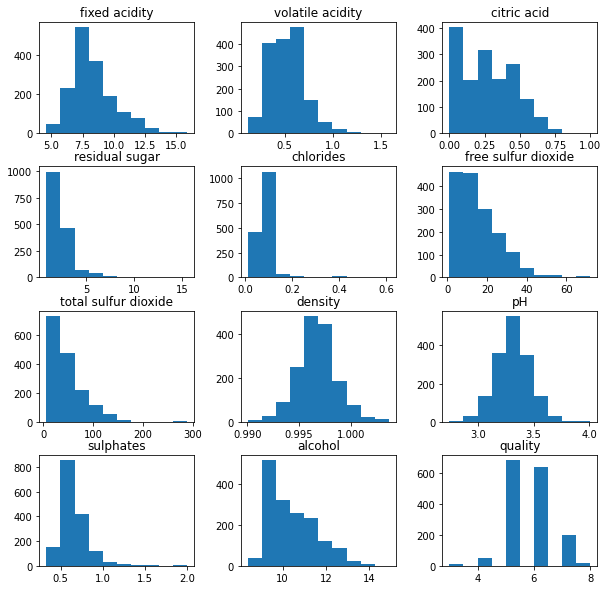

In [5]:
histograms=data.hist(grid=False, figsize=(10,10))

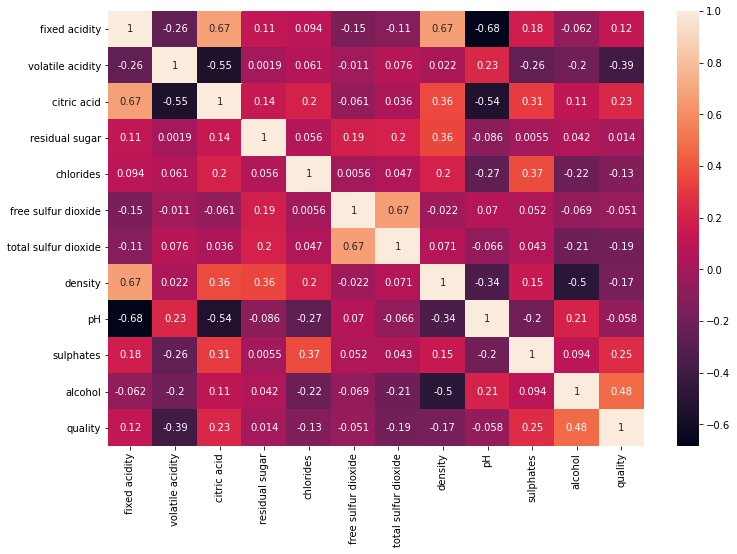

In [6]:
# Plot a heatmap with correlation score
plt.subplots(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)

By looking at the above heatmap, we see that  'volatile acidity', 'citric acid', 'sulphates', 'alcohol' are most correlated with 'quality', the dependent variable.  'fixed acidity', 'chlorides', 'total sulfur dioxide', 'density' are less correlated.


### Explore missing values

In [7]:
# Explore missing values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no missing data.

### Explore the data distribution in the dependent variable 

In [8]:
# Explore the dependent variable Y
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

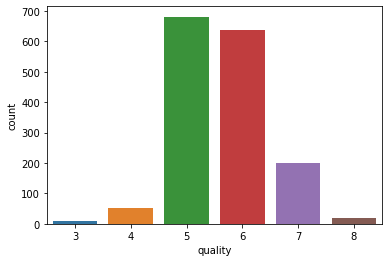

In [9]:
# Explore the dependent variable Y
sns.countplot(x='quality', data=data)
plt.show()

The independent variable has 6 classes. Models often work worse if the independent variable has too many classes. 6 classes are not too many. However, data is unbalanced among classes. Most observations are class 5 and class 6. Class 3 and 8 just have 18 observations (nearly 2%). When we split data for training and testing, it is likely there is no or a few observations labeled 3 or 8 in each subset. This means that we donot have enough data for model to learn or predict instances labeled 3 or 8. A way to solve this problem is turning the dependent variable into binary. 

In [10]:
# Turn the dependent variable into binary
# Class 3, 4, and 5 are turned into the "low quality" class; otherwise are "high quality"
data['quality']=np.where(data['quality']>5, 1,0)
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [11]:
data.quality.value_counts()

1    855
0    744
Name: quality, dtype: int64

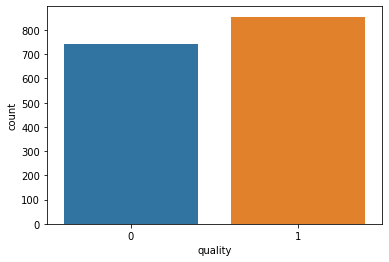

In [12]:
sns.countplot(x='quality', data=data)
plt.show()

## Building the Logistic Regression Model
Here, we can build two models with two sets of predictors. Since Logistic Regression is sensitive... The first model would use all independent variables as predictors. The second model only used the most correlated independent variables.

### Model 1:
X:  'volatile acidity', 'citric acid', 'sulphates', 'alcohol' are most correlated with 'quality', the dependent variable. 'fixed acidity', 'chlorides', 'total sulfur dioxide', 'density

Y: 'quality' (binary)

In [28]:
# Split data for training (80%) and testing (20%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['volatile acidity', 'citric acid', 'sulphates', 'alcohol',  'fixed acidity', 'chlorides', 'total sulfur dioxide', 'density']], data['quality'], train_size=0.8)
print ('Shapes of X_train, y_train: ', X_train.shape, y_train.shape)
print ('Shapes of X_test, y_test: ', X_test.shape, y_test.shape)

Shapes of X_train, y_train:  (1279, 8) (1279,)
Shapes of X_test, y_test:  (320, 8) (320,)


In [14]:
# Build the logistic regression model
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

# Fit the model into training set
lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
# Use the model to predict y in the test set
y_test_pred = lr.predict(X_test)

In [18]:
print (y_test_pred[:10])
print (y_test[:10])

[1 1 1 0 0 1 0 1 1 1]
675     0
327     0
1166    0
1262    0
627     0
336     1
103     0
876     0
527     1
606     1
Name: quality, dtype: int64


In [20]:
# Print estimate probability of classess in the test set
y_test_pred_prob = lr.predict_proba (X_test)
print(y_test_pred_prob[:10])

[[0.36515441 0.63484559]
 [0.10163947 0.89836053]
 [0.34059067 0.65940933]
 [0.59786092 0.40213908]
 [0.76568992 0.23431008]
 [0.05636093 0.94363907]
 [0.81518966 0.18481034]
 [0.23036572 0.76963428]
 [0.26311251 0.73688749]
 [0.06107974 0.93892026]]


In [29]:
# Evaluate the model
print('Accuracy of the model in the train set: {:.2f}'.format(lr.score(X_train, y_train)))
print('Accuracy of the model in the test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of the model in the train set: 0.74
Accuracy of the model in the test set: 0.75


In [30]:
# Evaluate with confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[79, 89],
       [78, 74]])

In [32]:
from sklearn.metrics import classification_report
print('model performance: \n', classification_report(y_test, y_test_pred))

model performance: 
               precision    recall  f1-score   support

           0       0.50      0.47      0.49       168
           1       0.45      0.49      0.47       152

    accuracy                           0.48       320
   macro avg       0.48      0.48      0.48       320
weighted avg       0.48      0.48      0.48       320

